In [1]:
import requests
from bs4 import BeautifulSoup
import nltk

### Contagem de palavras e análise de livros

Os livros escolhidos foram: 
"On the Origin of Species", de Charles Darwin;
"The Brothers Karamazov", de Fyodor Dostoyevsky; e
"The Trial", de Franz Kafka;


In [4]:
os_request = requests.get("https://www.gutenberg.org/cache/epub/22764/pg22764-images.html") 
fam_request = requests.get("https://www.gutenberg.org/cache/epub/28054/pg28054-images.html")
trial_request = requests.get("https://www.gutenberg.org/cache/epub/7849/pg7849.html")

os_request.encoding = 'utf-8'
fam_request.encoding = 'utf-8'
trial_request.encoding = 'utf-8'

html1 = os_request.text
html2 = fam_request.text
html3 = trial_request.text

print(html2[0:500])

<!DOCTYPE html>
<html lang="en" xml:lang="en">
<head>
<meta charset="utf-8">
<style>.xhtml_big {font-size: larger;}</style>
<meta name="generator" content="HTML Tidy for HTML5 for Linux version 5.6.0">
<title>The Project Gutenberg eBook of The Brothers Karamazov by Fyodor Dostoyevsky</title>

<style>/**/
body {
    margin-left: 20%;
    margin-right: 20%;
    text-align: justify
    }
h1, h2, h3, h4, h5 {
    text-align: center;
    font-style: normal;
    font-weight: normal;



In [5]:
soup1 = BeautifulSoup(html1, 'html.parser')
soup2 = BeautifulSoup(html2, 'html.parser')
soup3 = BeautifulSoup(html3, 'html.parser')

os_text = soup1.get_text()[783:-18724]
fam_text = soup2.get_text()[4871:-19054]
trial_text = soup3.get_text()[1495:-18433]

print(os_text[32000:32100])
print(fam_text[32000:32100])
print(trial_text[32000:32100])

ividuals of different species, is sometimes inherited and sometimes not so; why the child often reve
’s face at that minute. He used to say that it was frenzied but beautiful as he remembered. But he r
emen leaving - the
supervisor had stopped him noticing the three bank staff and now the
three bank


In [6]:
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

os_tokens = tokenizer.tokenize(os_text)
fam_tokens = tokenizer.tokenize(fam_text)
trial_tokens = tokenizer.tokenize(trial_text)

print(fam_tokens[1000:1010])
print(len(trial_tokens))

['Mitya', 'a', 'child', 'of', 'three', 'years', 'old', 'in', 'her', 'husband']
86332


In [7]:
from nltk.corpus import stopwords
nltk.download('stopwords')
sw = stopwords.words('english')

[nltk_data] Downloading package stopwords to /home/mateus/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
# Vamos filtrar as stop-words, e converter todas as palavras para letras minúsculas
os_words = [word.lower() for word in os_tokens if word.lower() not in sw]
fam_words = [word.lower() for word in fam_tokens if word.lower() not in sw]
trial_words = [word.lower() for word in trial_tokens if word.lower() not in sw]

print(os_words[1000:1010])
print(len(trial_words)) # Quase metade dos tokens foram filtrados por serem stop-words

['year', 'sent', 'memoir', 'subject', 'request', 'would', 'forward', 'sir', 'charles', 'lyell']
36749


In [9]:
# Criareamos, agora, a distribuição de frequência de cada palavra que restou para cada livro
os_freqdist = nltk.FreqDist(os_words)
fam_freqdist = nltk.FreqDist(fam_words)
trial_freqdist = nltk.FreqDist(trial_words)

In [64]:
os_freqdist
# A palavra mais frequente, 'species', revela de forma considerável o propósito e enredo do livro

FreqDist({'species': 1542, 'one': 649, 'may': 510, 'would': 496, 'many': 454, 'varieties': 435, 'selection': 418, 'forms': 408, 'natural': 389, 'two': 348, ...})

In [10]:
fam_freqdist
# A segunda palavra mais frequente é o nome de um dos protagonistas do livro (Alyosha Karamazov)
# Porém, o enredo não é explicitado de forma considerável pela frequente ocorrência dessa palavra

FreqDist({'one': 1603, 'alyosha': 1243, 'would': 1102, 'said': 995, 'mitya': 918, 'man': 908, 'know': 847, 'though': 836, 'father': 816, 'come': 776, ...})

In [11]:
trial_freqdist
# Assim como na distribuição de frequências do livro anterior, a palavra mais frequente, K, é o nome do protagonista (Josef K.)
# Também, da mesma forma como no livro anterior, o enredo do livro não é explicitado pela frequente ocorrência dessa palavra.

FreqDist({'k': 1174, 'said': 770, 'would': 442, 'even': 308, 'could': 306, 'one': 263, 'time': 245, 'lawyer': 214, 'like': 212, 'way': 208, ...})

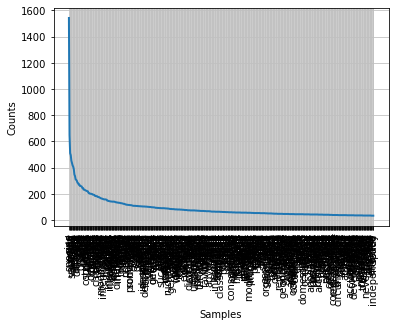

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [12]:
%matplotlib inline

os_freqdist.plot(500)
# Analisando a distribuição de frequências e o histograma, podemos dizer
# que o livro On the Origin of Species segue a Lei de Zipf

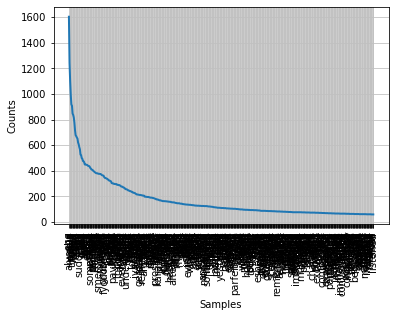

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [68]:
fam_freqdist.plot(500)
# Apesar da curva ser similar, observando a distribuição de frequências
# do livro 'The Brothers Karamazov', ele não parece seguir a Lei de Zipf comos os demais
# Ex: a 7ª palavra mais frequente, 'know', deveria ocorrer aproximadamente k/7 = 1606/7 = 229 vezes, mas ocorre 848 vezes (número consideravelmente maior)

In [14]:
# Mas vamos além:
# Vamos criar um array de palavras cujos valores foram ordenados a partir de suas respectivas frequências:
sorted_fam_values = [k for k, v in sorted(fam_freqdist.items(), reverse=True, key=lambda item: item[1])]
print(sorted_fam_values[1:100])

['alyosha', 'would', 'said', 'mitya', 'man', 'know', 'though', 'father', 'come', 'ivan', 'time', 'like', 'could', 'even', 'go', 'see', 'suddenly', 'say', 'tell', 'must', 'day', 'old', 'cried', 'little', 'love', 'well', 'good', 'three', 'went', 'away', 'every', 'us', 'last', 'money', 'shall', 'something', 'god', 'nothing', 'perhaps', 'face', 'thought', 'without', 'first', 'two', 'back', 'life', 'dmitri', 'smerdyakov', 'still', 'never', 'moment', 'heart', 'let', 'made', 'began', 'grushenka', 'told', 'believe', 'fyodorovitch', 'take', 'long', 'may', 'yes', 'great', 'looked', 'eyes', 'people', 'make', 'give', 'almost', 'way', 'fyodor', 'pavlovitch', 'yet', 'look', 'came', 'much', 'oh', 'brother', 'want', 'whole', 'thousand', 'might', 'another', 'think', 'put', 'asked', 'everything', 'course', 'get', 'always', 'going', 'understand', 'room', 'hand', 'upon', 'right', 'young', 'heard']


In [15]:
# Agora, compararemos uma palavra mais distante da superfície: a 25ª (de índice 24 no array) e a 50ª (de índice 49)
# De acordo com a Lei de Zipf, tais palavras deveriam ter, aproximamanete, frequência igual a 107 e 64, respectivamente

print(fam_freqdist[sorted_fam_values[24]])
print(fam_freqdist[sorted_fam_values[49]])

# Podemos ver que, de fato, o livro não parece seguir a Lei de Zipf

474
376


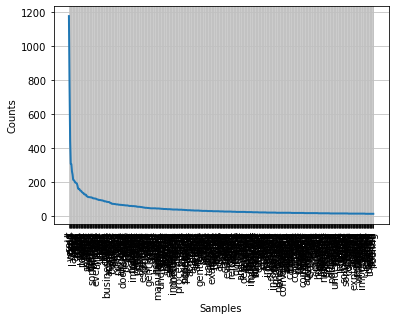

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [16]:
trial_freqdist.plot(500)
# Analisando a distribuição de frequências e o histograma, podemos dizer
# que o livro 'The Trial' parece, também, seguir a Lei de Zipf

#### Conclusão: as distribuições de frequência primeiro e o terceiro livro seguem a Lei de Zipf. A do segundo, por ser de um livro pequeno, não parece seguí-la de forma significativa.

#### Bônus
Análise a partir de bigramas:

In [72]:
from nltk import bigrams

os_bigrams = list(bigrams(os_words))
fam_bigrams = list(bigrams(fam_words))
trial_bigrams = list(bigrams(trial_words))

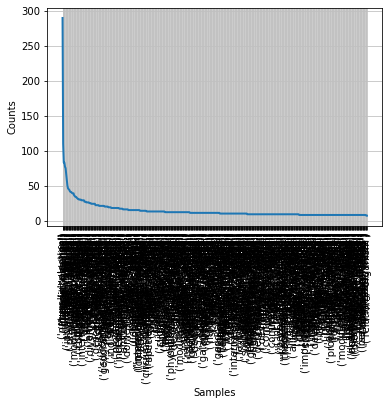

FreqDist({('natural', 'selection'): 290, ('conditions', 'life'): 110, ('species', 'genus'): 83, ('organic', 'beings'): 83, ('one', 'species'): 77, ('distinct', 'species'): 75, ('closely', 'allied'): 66, ('forms', 'life'): 58, ('allied', 'species'): 50, ('individuals', 'species'): 46, ...})

In [73]:
os_bigrams_freqdist = nltk.FreqDist(os_bigrams)

os_bigrams_freqdist.plot(500)

os_bigrams_freqdist

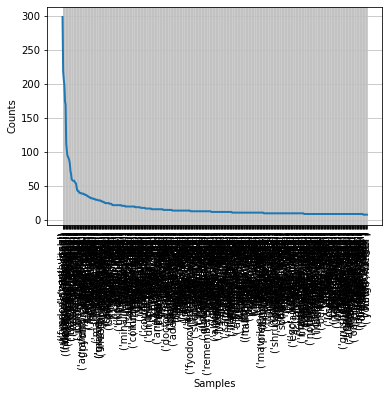

FreqDist({('fyodor', 'pavlovitch'): 299, ('every', 'one'): 219, ('old', 'man'): 207, ('katerina', 'ivanovna'): 199, ('three', 'thousand'): 175, ('dmitri', 'fyodorovitch'): 170, ('alexey', 'fyodorovitch'): 113, ('nikolay', 'parfenovitch'): 103, ('father', 'zossima'): 95, ('madame', 'hohlakov'): 93, ...})

In [74]:
fam_bigrams_freqdist = nltk.FreqDist(fam_bigrams)
fam_bigrams_freqdist.plot(500)
fam_bigrams_freqdist


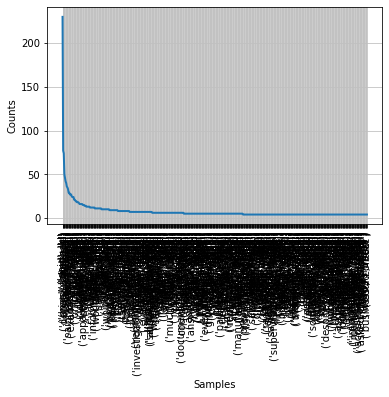

FreqDist({('said', 'k'): 230, ('asked', 'k'): 77, ('miss', 'bürstner'): 74, ('mrs', 'grubach'): 50, ('deputy', 'director'): 46, ('said', 'painter'): 42, ('k', 'uncle'): 40, ('said', 'lawyer'): 36, ('yes', 'said'): 35, ('said', 'businessman'): 33, ...})

In [75]:
trial_bigrams_freqdist = nltk.FreqDist(trial_bigrams)
trial_bigrams_freqdist.plot(500)
trial_bigrams_freqdist